# Label images
Conceptionally, label images are an extension of binary images. In a label image, all pixels with value 0 correspond to background, a special region which is not considered as any object. Pixels with a value larger than 0 denote that the pixel belongs to an object and identifies that object with the given number. A pixel with value `1` belongs to  first object and pixels with value `2` belongs to a second object and so on. Ideally, objects are labeled subsequently, because then, the maximum intensity in a label image corresponds to the number of labeled objects in this image.

# Connected component labeling
We can technially use both alternatives for connected components labeling, depending on the connectivity that is used for connecting pixels in the [label function](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label).

Connectivity
1. [von Neumann, 4-connected](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood)
2. [Moore, 8-connected](https://en.wikipedia.org/wiki/Moore_neighborhood)

## 4-connected component labeling

See also
* [Connected-component labeling](https://en.wikipedia.org/wiki/Connected-component_labeling)

We start with a made up binary image.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from pyclesperanto_prototype import imshow

binary_image = np.asarray([
    [1, 1, 0, 0, 0, 0 ,0],
    [0, 0, 1, 0, 0, 0 ,0],
    [0, 0, 0, 1, 1, 1 ,0],
    [0, 0, 0, 1, 1, 1 ,0],
    [1, 1, 0, 0, 0, 0 ,0],
    [1, 1, 0, 0, 1, 1 ,1],
    [1, 1, 0, 0, 1, 1 ,1],    
])

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:14: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


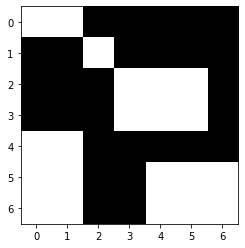

In [2]:
imshow(binary_image, color_map='Greys_r')

This binary image can be interpreted in two ways: Either there are five rectangles with size ranging between 1 and 6. Alternatively, there are two rectangles with size 6 and one snake-like structure of size 9 pixels.



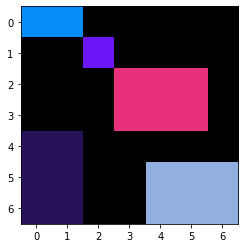

In [3]:
from skimage.measure import label
labeled_4_connected = label(binary_image, connectivity=1)

imshow(labeled_4_connected, labels=True)

## 8-connected component labeling

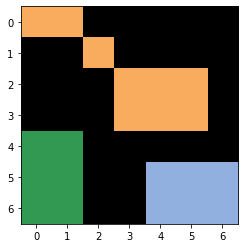

In [4]:
from skimage.measure import label
labeled_8_connected = label(binary_image, connectivity=2)

imshow(labeled_8_connected, labels=True)

In practice, for counting cells, the connectivity is not so important. This is why the connectivity parameter is often not provided.

## Connected component labeling in clesperanto
In clesperanto, both connectivity options for connected component labeling is implemented in two different functions. When labeling objects using the 4-connected pixel neighborhood, we consider the "diamond" neighborhood of all pixels.

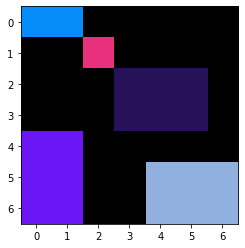

In [5]:
labeled_4_connected2 = cle.connected_components_labeling_diamond(binary_image)

imshow(labeled_4_connected2, labels=True)

The 8-connected neighborhood considers a "box" around all pixels.

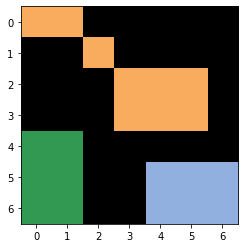

In [6]:
labeled_8_connected2 = cle.connected_components_labeling_box(binary_image)

imshow(labeled_8_connected2, labels=True)

## Labeling in practice
To demonstrate labeling in a practical use case, we label the blobs.tif image.

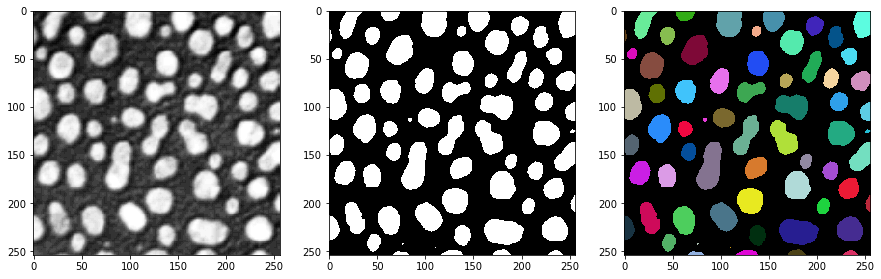

In [7]:
# Load data
from skimage.io import imread
blobs = imread("../../data/blobs.tif")

# Thresholding
from skimage.filters import threshold_otsu
threshold = threshold_otsu(blobs)
binary_blobs = blobs > threshold

# Connected component labeling
from skimage.measure import label
labeled_blobs = label(binary_blobs)

# Visualization
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

cle.imshow(blobs, plot=axs[0])
cle.imshow(binary_blobs, plot=axs[1])
cle.imshow(labeled_blobs, plot=axs[2], labels=True)

## Exercise
Find out experimentally what the default setting of the connectivity parameter of the `skimage.measure.label` function is.